# Exploratory Data Analysis

## Loading Data

In [276]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [277]:
data = pd.read_csv('dataset/titanic.csv')

## Bivariate & Multivariate
### Univariate:
- Cek dimensi data (tabel-tabel)
- Cek tipe data dari masing-masing kolom
- Tampilkan sebagian value dari masing-masing kolom
- Lakukan perhitungan descriptive statistics untuk tiap kolom
- Lakukan analisis visual dengan memplot tiap variable
- Cek missing value
- Cek duplikasi
- Cek validitas (format / range / limit / reference / dll)
- cek duplikat

### Multivariate:
- bivariate analysis
    - Two Categorical
    - Categorical and Numerical
    - Two Numerical
- multivariate
    - Dimensionality Reduction

### Cek Data

In [278]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Hasil Univariate Analisis

- target variable adalah 'Survived'. 38.4% survived
- tipe variable
    - Categorical: Sex, Embarked
    - Ordinal: PClass
    - Continuous: Age, Fare
    - Discrete: SibSp, Parch
- the middle part of each name is a title of the person, other than that, we can drop the Name column
- Age has some missing value that need to be inputed
- Cabin has too many missing value, we can drop it
- Ticket has too many unique value with difference formats, so we can drop it as well
- Passenger Id holds the unique ID of each person, not much information given for predictiong survivability

In [279]:
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data.drop(columns=['Name','Ticket','Cabin','PassengerId'], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## Bivariate Analysis

### Categorical to Categorical

Untuk memeriksa korelasi antara dua variabel kategori, kita dapat mencoba membuat Tabel Kontingensi (cross tabulation/crosstab). Selain itu, untuk memvisualisasikan hasil crosstab, kita dapat memplotnya menggunakan diagram batang atau factor plot.

Jika kita ingin menguji ketergantungan dua variabel kategorikal dengan pendekatan statistik, kita dapat menggunakan chi-square test. 

Namun, pada kesempatan ini, kita tidak akan menekankan pada pengujian tersebut melainkan hanya melihat ketergantungan berdasarkan visualisasi.

#### Sex dan Survived

###### Cross Tab

In [280]:
df_sex_ct = pd.crosstab(data['Sex'], data['Survived'],margins=True)
df_sex_ct.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


###### Chi Square

In [281]:
from scipy.stats import chi2_contingency
  
def chi_test(data):    
    # defining the table
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

chi_test(df_sex_ct)

p value is 1.0036732821369117e-55
Dependent (reject H0)


###### Visualisasi

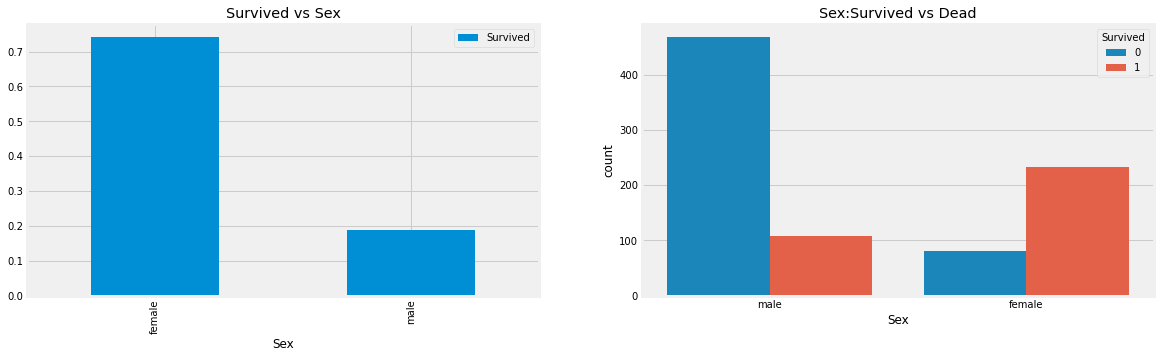

In [282]:
f,ax=plt.subplots(1,2,figsize=(18,5))

# subplot 1
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# subplot 2 
sns.countplot('Sex',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

# show
plt.show()

<details>
Jumlah pria di kapal jauh lebih banyak daripada jumlah wanita. Namun jumlah wanita yang diselamatkan hampir dua kali lipat jumlah pria yang diselamatkan. Tingkat Survival untuk **perempuan di kapal adalah sekitar 75% sedangkan untuk pria di sekitar 18-19%**.

Sex tampaknya menjadi fitur yang **sangat penting** untuk pemodelan. Tapi sebelum itu kita perlu juga melihat fitur lainnya.
</details>

#### Pclass and Survived

In [283]:
df_pclass_ct = pd.crosstab(data.Pclass,data.Survived,margins=True)
df_pclass_ct.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [284]:
chi_test(df_pclass_ct)

p value is 6.258462423531468e-20
Dependent (reject H0)


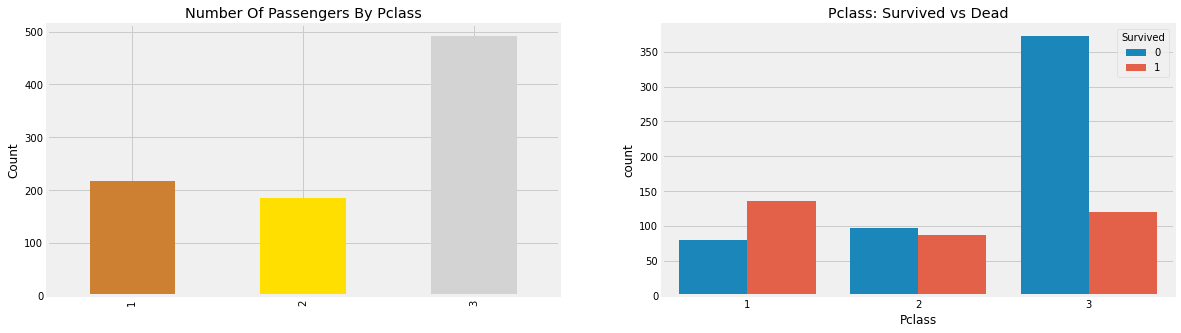

In [285]:
f,ax=plt.subplots(1,2,figsize=(18,5))

#subplot 1
data['Pclass'].value_counts().sort_index().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

#subplot 2
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

#show
plt.show()

<details>
Dapat dilihat dengan jelas bahwa penumpang Pclass 1 mendapatkan prioritas yang sangat tinggi dalam proses penyelamatan. Meski jumlah Penumpang di Pclass 3 jauh lebih tinggi, namun angka survival dari mereka masih sangat rendah, sekitar 25%.

Untuk Pclass 1 penumpang selamat sekitar 63% sedangkan untuk Pclass2 sekitar 48%. 

Mari dalami lebih lanjut dan periksa hal lainnya. Mari kita periksa tingkat survival dengan **Seks dan Pclass** secara bersama-sama.
</details>

In [286]:
pd.crosstab([data.Sex,data.Pclass],data.Survived,margins=True).style.background_gradient(cmap='summer_r')

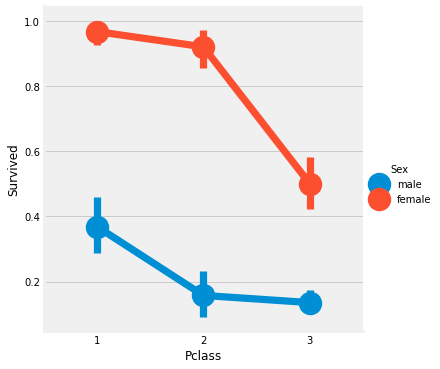

In [287]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

<details>
Kita bisa menggunakan FactorPlot dalam kasus ini, karena menjadikan pemisahan nilai kategorikal menjadi mudah.

Dengan melihat CrossTab dan FactorPlot, kita dapat dengan mudah menyimpulkan bahwa kelangsungan hidup Wanita pada  Pclass1 adalah sekitar 95-96%, karena hanya 3 dari 94 Wanita dari Pclass1 yang meninggal.

Terbukti bahwa terlepas dari Pclass, Wanita diberi prioritas pertama saat penyelamatan. Bahkan Pria dari Pclass 1 memiliki tingkat kelangsungan hidup yang sangat rendah.
</details>

#### Embarked and Survived

In [288]:
pd.crosstab(data['Embarked'], data['Survived']).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


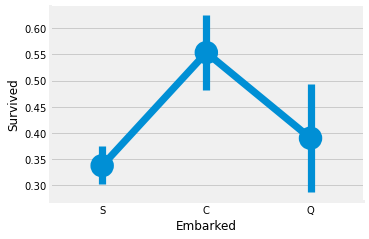

In [289]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

<details>
Peluang bertahan hidup untuk Port C tertinggi sekitar 0,55 sedangkan terendah untuk S.

Mari gabungkan fitur kategorikal lainnya ke variabel Embarked ini.
</details>

In [290]:
pd.crosstab([data.Embarked,data.Pclass],data.Survived,margins=True).style.background_gradient(cmap='summer_r')

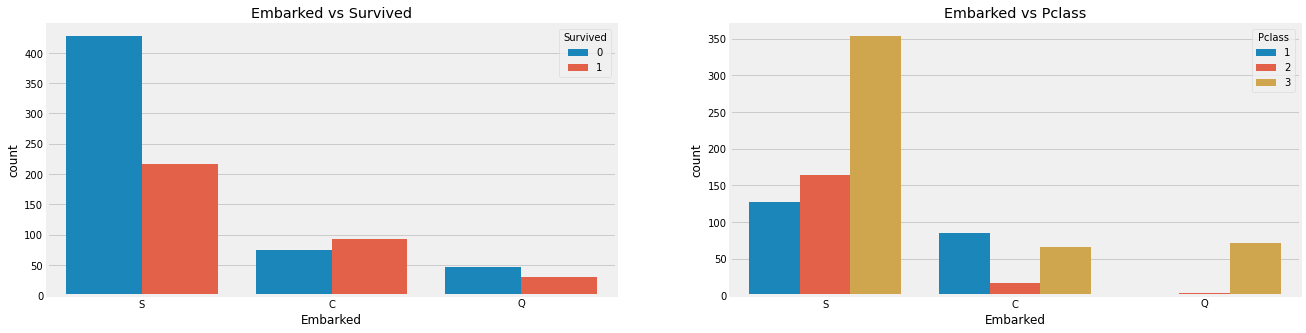

In [291]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<details>
Pengamatan:
1. Maksimal penumpang yang naik dari S. Mayoritas dari Pclass3.

2. Penumpang dari C terlihat beruntung karena sebagian besar dari mereka selamat. Alasan untuk ini mungkin penyelamatan semua Penumpang Pclass1 dan Pclass2.

3. Pelabuhan S adalah tempat mayoritas orang kaya naik. Peluang bertahan hidup masih rendah di sini, karena banyak penumpang dari Pclass3 sekitar 81% tidak selamat.

4. Pelabuhan Q memiliki hampir 95% penumpang berasal dari Pclass3.
    
</details>

#### Initial vs Survived

In [292]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [293]:
pd.crosstab(data.Initial,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Initial,,,
Master,17,23,40
Miss,55,131,186
Mr,443,86,529
Mrs,26,101,127
Other,8,1,9
All,549,342,891


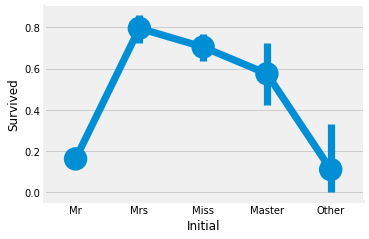

In [294]:
sns.factorplot('Initial','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

<details>
Hasilnya menunjukkan hasil yang serupa, inisial untuk wanita memiliki tingkat kelangsungan hidup yang lebih tinggi. Namun kami mendapat temuan baru, hal ini menunjukkan bahwa inisial untuk anak (master) memiliki tingkat kelangsungan hidup yang cukup tinggi.
</details>

### Numeric to Categorical

Seperti yang telah dijelaskan sebelumnya, kita dapat melakukan uji chi-squared untuk mengetahui signifikansi korelasi antara dua variabel kategori. 

Nah, jika kita ingin menguji korelasi antara variabel kategorikal dan numerik, kita dapat melakukan uji ANNOVA.

Kali ini kita hanya akan menitikberatkan pengamatan korelasi berdasarkan analisis visual. Untuk melakukannya, kita dapat membuat boxplot/histogram/distplot yang dikelompokkan serta plot biola untuk menunjukkan distribusi kuantitatif yang berbeda di antara setiap kategori.

#### Age and Initial

<AxesSubplot:xlabel='Initial', ylabel='Age'>

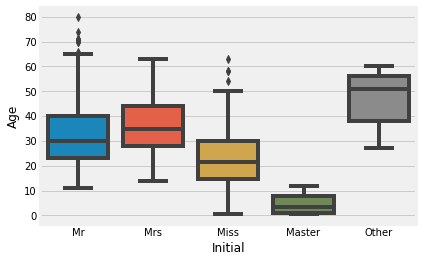

In [295]:
sns.boxplot(x='Initial', y='Age', data=data)

In [296]:
from scipy.stats import f_oneway

grp = data.groupby("Pclass").groups
f_oneway(data.Age[grp[1]], data.Age[grp[2]], data.Age[grp[3]])


F_onewayResult(statistic=nan, pvalue=nan)

<details>
Kita dapat melihat dari boxplot bahwa Master adalah inisial untuk anak dan miss adalah inisial untuk orang yang lebih muda (mungkin wanita)
</details>

<AxesSubplot:xlabel='Initial', ylabel='count'>

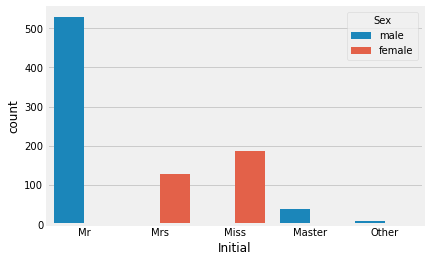

In [297]:
sns.countplot('Initial',hue='Sex',data=data)

<details>
Kita dapat menggunakan info korelasi ini untuk memasukkan nilai yang hilang di kolom Age. Kita akan menggunakan nilai rata-rata usia dari setiap kelompok Initial.
</details>

In [298]:
map_dict = data.groupby('Initial')['Age'].mean().round().to_dict()
print(map_dict)

for initial in map_dict.keys():
    data.loc[(data.Age.isnull())&(data.Initial==initial),'Age']=map_dict[initial]

data.Age.isnull().any()

{'Master': 5.0, 'Miss': 22.0, 'Mr': 33.0, 'Mrs': 36.0, 'Other': 46.0}


False

In [299]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,22.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [300]:
data.apply(lambda x: map_dict[x.Initial], axis=1)

# data.Age.isna().sum()

0      33.0
1      36.0
2      22.0
3      36.0
4      33.0
       ... 
886    46.0
887    22.0
888    22.0
889    33.0
890    33.0
Length: 891, dtype: float64

In [301]:
data.Age[888]

22.0

#### Age and Survived

<AxesSubplot:xlabel='Survived', ylabel='Age'>

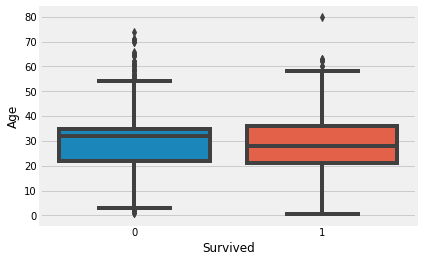

In [302]:
sns.boxplot(x='Survived', y='Age', data=data)

<AxesSubplot:ylabel='Density'>

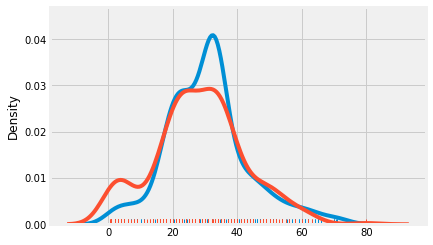

In [303]:
target_0 = data.loc[data['Survived'] == 0]
target_1 = data.loc[data['Survived'] == 1]

sns.distplot(target_0[['Age']], hist=False, rug=True)
sns.distplot(target_1[['Age']], hist=False, rug=True)


<details>
Kita tidak dapat menyimpulkan korelasi apapun antara Age dan Survived.

Kita dapat melihat dari distplot bahwa seorang anak usia sampai 10 tahun, memiliki tingkat kelangsungan hidup yang lebih tinggi daripada orang lain yang lebih tua dari mereka. Hal ini ditunjukkan dengan garis distribusi merah yang lebih tinggi pada rentang usia tersebut. Kita bisa membuat fitur baru untuk menandai orang sebagai anak <= 10 tahun.

</details>

#### Fare and Survived

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

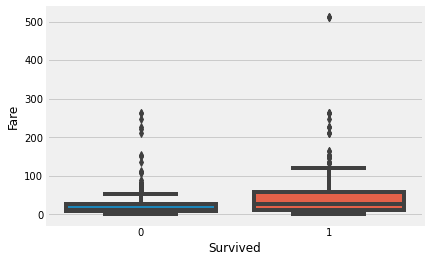

In [304]:
sns.boxplot(x='Survived', y='Fare', data=data)

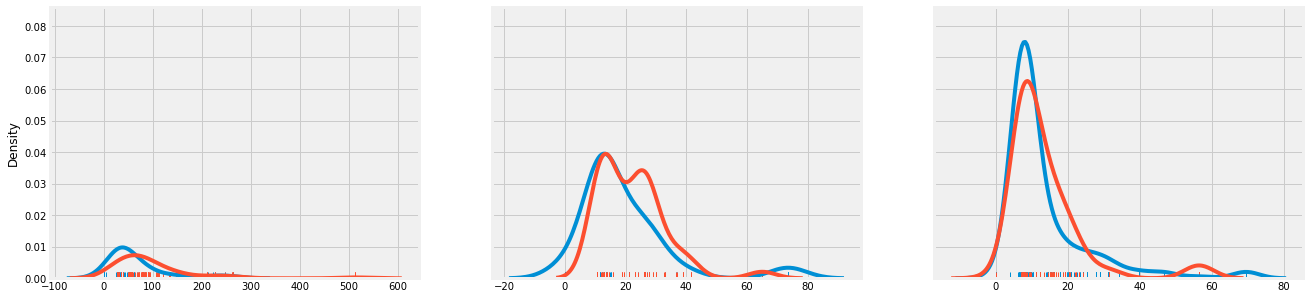

In [305]:
target_0 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 1)]
target_1 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 2)]
target_2 = data.loc[(data['Survived'] == 0) & (data['Pclass'] == 3)]
target_3 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 1)]
target_4 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 2)]
target_5 = data.loc[(data['Survived'] == 1) & (data['Pclass'] == 3)]


f,ax=plt.subplots(1,3,figsize=(20,5),sharey=True)
sns.distplot(target_0[['Fare']], hist=False, rug=True, ax=ax[0])
# ax[0,0].set_title('Pclass 1 Not Survive')
sns.distplot(target_1[['Fare']], hist=False, rug=True, ax=ax[1])
# ax[0,1].set_title('Pclass 2 Not Survive')
sns.distplot(target_2[['Fare']], hist=False, rug=True, ax=ax[2])
# ax[0,2].set_title('Pclass 2 Not Survive')
sns.distplot(target_3[['Fare']], hist=False, rug=True, ax=ax[0])
# ax[1,0].set_title('Pclass 1 Survive')
sns.distplot(target_4[['Fare']], hist=False, rug=True, ax=ax[1])
# ax[1,1].set_title('Pclass 2 Survive')
sns.distplot(target_5[['Fare']], hist=False, rug=True, ax=ax[2])
# ax[1,2].set_title('Pclass 3 Survive')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

<details>
Semakin tinggi Fare, semakin selamat, seperti yang dapat dilihat pada kepadatan garis merah yang lebih tinggi saat Fare menjadi lebih tinggi. Seperti yang kita ketahui sebelumnya, PClass 1 adalah kelas yang paling mahal dan PClass 3 adalah tiket kelas yang paling rendah.
</details>


#### SibSp and Survived
Fitur ini menunjukkan apakah seseorang sendirian atau bersama anggota keluarganya. Saudara = saudara laki-laki, saudara perempuan, saudara tiri, saudara tiri Pasangan = suami, istri

meskipun variabel ini merupakan variabel numerik diskrit, kita dapat melakukan analisis visual yang sama dengan plot faktor karena variabel ini memiliki rentang nilai yang kecil

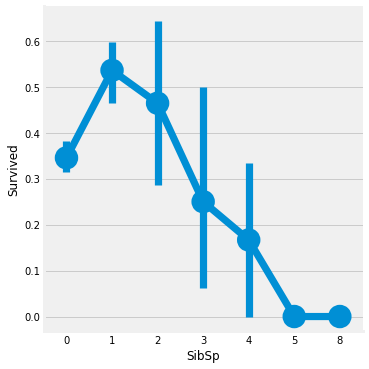

In [306]:
sns.factorplot('SibSp','Survived', data=data)

<details>
Factor plot menunjukkan bahwa jika penumpang sendirian di dalam pesawat tanpa saudara kandung, dia memiliki tingkat Survival 34,5%. Grafiknya secara kasar menurun jika jumlah saudara kandung bertambah. Ini masuk akal. Artinya, jika saya memiliki keluarga di kapal, saya akan mencoba menyelamatkan mereka daripada menyelamatkan diri saya terlebih dahulu. Yang mengejutkan, kelangsungan hidup keluarga dengan 5-8 anggota adalah 0%. Alasannya mungkin Pclass??
</details>

In [307]:
pd.crosstab([data.Pclass,data.Survived],data.SibSp).style.background_gradient(cmap='summer_r')

<details>Alasannya adalah Pclass. Crosstab menunjukkan bahwa Orang dengan SibSp> 3 semuanya ada di Pclass3. Hampir semua keluarga besar di Pclass3(>3) mati.</details>

#### Parch and Survived

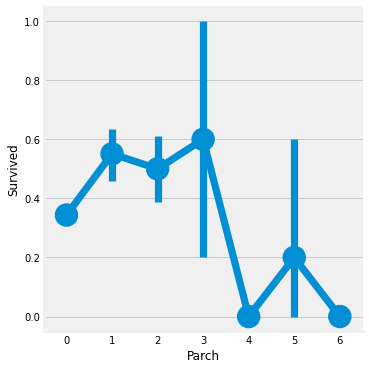

In [308]:
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
plt.show()

<details>
Di sini juga hasilnya sangat mirip. Penumpang dengan orang tua/anak mereka di dalam pesawat memiliki peluang lebih besar untuk bertahan hidup. Namun berkurang seiring dengan bertambahnya jumlah.

Peluang bertahan hidup baik untuk seseorang yang memiliki 1-3 orang tua/anak di kapal. Sendirian juga terbukti berakibat fatal dan peluang untuk bertahan hidup berkurang ketika seseorang memiliki > 4 orang tua / anak di kapal.
</details>

#### Parch + SibSp

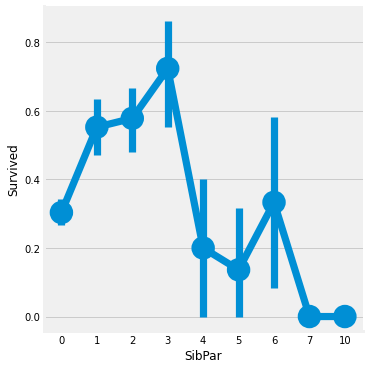

In [309]:
data['SibPar'] = data['SibSp'] + data['Parch']
sns.factorplot('SibPar','Survived',data=data,ax=ax[1])
plt.show()

### Two Numerical

Contingency tables are useful when both variables are qualitative, whereas if we want to show correlation between Scatter two quantitative varible, scatter plot is proven to be effective.

Graphs are nice, but if we need a numerical indicator that can tell us whether our variables are correlated, we need a statistical approach to do so. As the other pairs of variable type, we can use the Pearson’s correlation coefficient to shows us how high the correlation between the two variables.

Strong correlation?

![](http://www.uow.edu.au/content/groups/public/@web/@stsv/documents/mm/uow153493.gif)

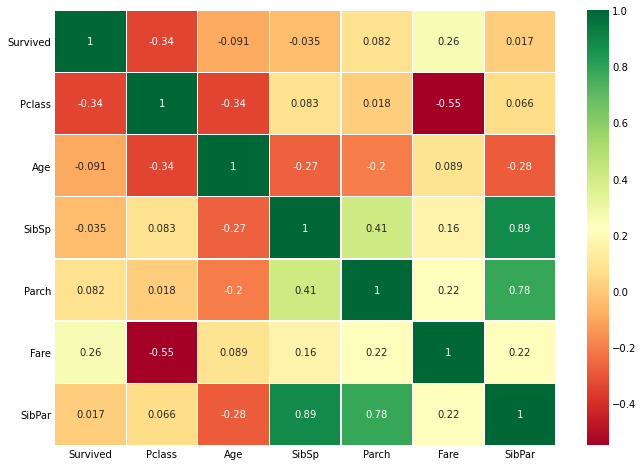

In [310]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<details>Interpreting The Heatmap
Hal pertama yang perlu diperhatikan adalah bahwa hanya fitur numerik yang dibandingkan karena jelas bahwa kita tidak dapat menghubungkan antara abjad atau string. Sebelum memahami plot, mari kita lihat apa sebenarnya korelasi itu.

**KORELASI POSITIF**: Jika peningkatan fitur A menyebabkan peningkatan fitur B, maka mereka berkorelasi positif. Nilai 1 berarti korelasi positif sempurna.

**KORELASI NEGATIF**: Jika peningkatan fitur A menyebabkan penurunan fitur B, maka mereka berkorelasi negatif. Nilai -1 berarti korelasi negatif sempurna.

Sekarang katakanlah dua fitur berkorelasi tinggi atau sempurna, jadi peningkatan di satu fitur mengarah ke peningkatan di fitur lainnya. Ini berarti bahwa kedua fitur tersebut mengandung informasi yang sangat mirip dan sangat sedikit atau tidak ada perbedaan informasi. Ini dikenal sebagai MultiColinearity karena keduanya berisi informasi yang hampir sama.

Jadi menurut Anda kita harus menggunakan keduanya karena salah satunya berlebihan. Saat membuat atau melatih model, kita harus mencoba menghilangkan fitur yang berlebihan karena mengurangi waktu pelatihan dan banyak keuntungan lainnya.

Sekarang dari peta panas di atas, kita dapat melihat bahwa fitur-fiturnya tidak banyak berkorelasi. Korelasi tertinggi antara SibSp dan Parch yaitu 0,41.
</details>

### Observations in a Nutshell for all features:

<details>
**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

K*Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.
    
</details>

## Multivariate Analysis

Kita akan melangkah lebih jauh dan mempelajari hubungan antara 3 atau lebih variabel pada saat yang bersamaan. Ini disebut analisis eksplorasi multivariat.

Untuk membuat grafik dengan 2 variable itu mudah.
Namun untuk membuat grafik dengan 3 variable atau lebih, kita perlu menggunakan teknis dimensionality reduction. Dalam hal ini PCA.

##### Analisis PCA
PCA memungkinkan kita mengurangi jumlah variabel dengan menemukan variabel baru yang menggabungkan esensi dari beberapa variabel lainnya. Menemukan variabel seperti itu memungkinkan kita untuk mengganti beberapa kolom dalam tabel hanya dengan beberapa. Dengan melakukan itu, kita akan kehilangan sedikit informasi, tetapi kita dapat membuat pilihan yang tepat dengan menimbang manfaat dari menyederhanakan data terhadap sisi negatif dari informasi yang hilang.

In [311]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Sex'] = data.Sex.map({'male':0,'female':1})

from sklearn.preprocessing import OneHotEncoder
embEncoder = OneHotEncoder()

transformed = embEncoder.fit_transform(data.Embarked.to_numpy().reshape(-1,1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=embEncoder.get_feature_names()).iloc[:,:-1]
data = pd.concat([data, ohe_df], axis=1).drop(['Embarked'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Initial,SibPar,x0_C,x0_Q
0,0,3,0,22.0,1,0,7.2500,Mr,1,0.0,0.0
1,1,1,1,38.0,1,0,71.2833,Mrs,1,1.0,0.0
2,1,3,1,26.0,0,0,7.9250,Miss,0,0.0,0.0
3,1,1,1,35.0,1,0,53.1000,Mrs,1,0.0,0.0
4,0,3,0,35.0,0,0,8.0500,Mr,0,0.0,0.0


In [312]:
intEncoder = OneHotEncoder()
transformed = intEncoder.fit_transform(data.Initial.to_numpy().reshape(-1,1))
ohe_df = pd.DataFrame(transformed.toarray(), columns=intEncoder.get_feature_names()).iloc[:,:-1]
data = pd.concat([data, ohe_df], axis=1).drop(['Initial'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SibPar,x0_C,x0_Q,x0_Master,x0_Miss,x0_Mr,x0_Mrs
0,0,3,0,22.0,1,0,7.2500,1,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,1,26.0,0,0,7.9250,0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,35.0,1,0,53.1000,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,0,35.0,0,0,8.0500,0,0.0,0.0,0.0,0.0,1.0,0.0


In [313]:
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
data['Age'] = minMax.fit_transform(data.Age.to_numpy().reshape(-1,1))
data['Fare'] = minMax.fit_transform(data.Fare.to_numpy().reshape(-1,1))
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SibPar,x0_C,x0_Q,x0_Master,x0_Miss,x0_Mr,x0_Mrs
0,0,3,0,0.271174,1,0,0.014151,1,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,1,0.472229,1,0,0.139136,1,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,1,0.321438,0,0,0.015469,0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,0.434531,1,0,0.103644,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,0,0.434531,0,0,0.015713,0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0, 0.5, 'cumulative explained variance')

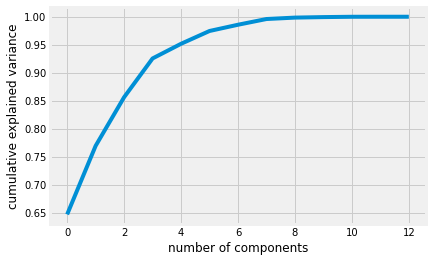

In [314]:
from sklearn.decomposition import PCA

try_pca = PCA().fit(data.iloc[:,1:])
plt.plot(np.cumsum(try_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [315]:
pca_obj = PCA(n_components=2)
hasil = pca_obj.fit_transform(data.iloc[:,1:])
hasil_pca = pd.concat([pd.DataFrame(hasil,columns=['Pca1','Pca2']),data['Survived']], axis = 1)
hasil_pca.head()

,Pca1,Pca2,Survived
0,0.158257,-0.989952,0
1,0.254525,1.547738,1
2,-0.972487,-0.272248,1
3,0.264734,1.407328,1
4,-1.146907,-0.851793,0


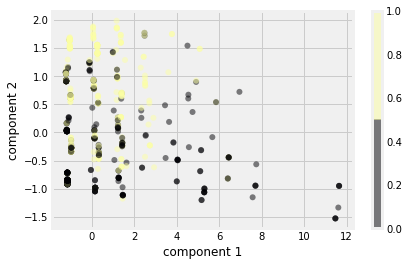

In [316]:
plt.scatter(hasil_pca['Pca1'], hasil_pca['Pca2'],
            c=hasil_pca['Survived'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('inferno', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [317]:
pca_obj = PCA(n_components=3)
hasil = pca_obj.fit_transform(data.iloc[:,1:])
hasil_pca = pd.concat([pd.DataFrame(hasil,columns=['Pca1','Pca2','Pca3']),data['Survived']], axis = 1)
hasil_pca.head()

,Pca1,Pca2,Pca3,Survived
0,0.158257,-0.989952,-0.473083,0
1,0.254525,1.547738,-0.439699,1
2,-0.972487,-0.272248,0.989900,1
3,0.264734,1.407328,-0.409462,1
4,-1.146907,-0.851793,-0.024660,0


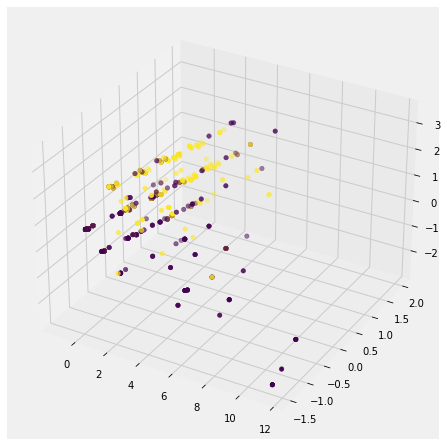

In [318]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(10,6))
ax = Axes3D(fig)

ax.scatter(hasil_pca['Pca1'], hasil_pca['Pca2'], hasil_pca['Pca3'],c=hasil_pca['Survived'])
pyplot.show()

In [319]:
data.Age

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.271174
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64